In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import datetime

### IMPORTATION DATA

In [13]:
data = pd.read_csv('data/ONLINE_RETAILS.xlsx - Online Retail.csv')

In [14]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,"0,85",12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,"2,1",12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,"4,15",12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,"4,15",12680.0,France


In [15]:
data[data['StockCode'] == '84406B']['Quantity'].sum()

1422

## Change date format

In [16]:
data.InvoiceDate.tail()

541904    12/9/11 12:50
541905    12/9/11 12:50
541906    12/9/11 12:50
541907    12/9/11 12:50
541908    12/9/11 12:50
Name: InvoiceDate, dtype: object

In [17]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [18]:
data.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,"4,15",12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,"4,15",12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,"4,95",12680.0,France


## PREPROCESSING

##### Objectif :
Comprendre du mieux possible nos données pour développer une premiere stratégie de modélisation
- traiter les variables null
- traiter les doublons


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  object        
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [172]:
data.describe()

,Quantity,CustomerID
count,541909.000000,406829.000000
mean,9.552250,15287.690570
std,218.081158,1713.600303
min,-80995.000000,12346.000000
25%,1.000000,13953.000000
50%,3.000000,15152.000000
75%,10.000000,16791.000000
max,80995.000000,18287.000000


<AxesSubplot:ylabel='None'>

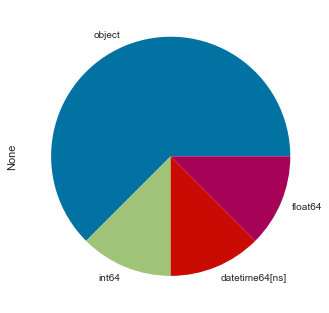

In [173]:
data.dtypes.value_counts().plot.pie()

In [23]:
len(data)

541909

### Verification des valeurs Nulls

    - conclusion: y'a que la colonne CustomerID qui contient des valeurs null comme l'image ci-dessous nous illustre

<AxesSubplot:>

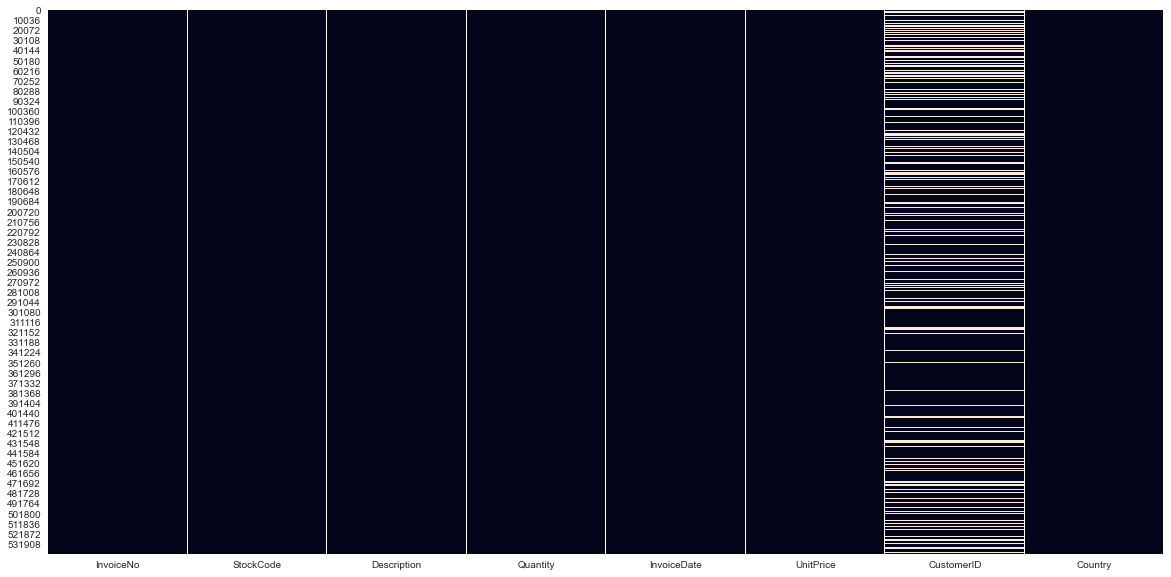

In [604]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [174]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
Description    0.002683
CustomerID     0.249267
dtype: float64

In [175]:
df = data.set_index('InvoiceDate')

In [176]:
df.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=541909, freq=None)

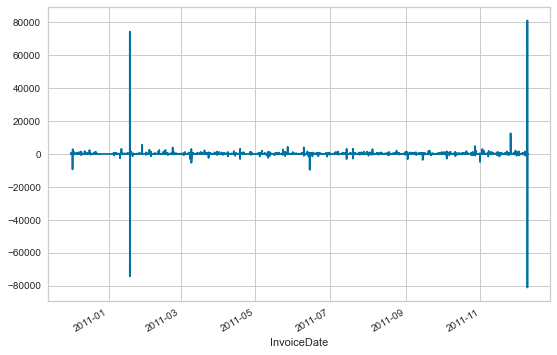

In [177]:
df['Quantity'].plot(figsize=(9, 6))
plt.show()

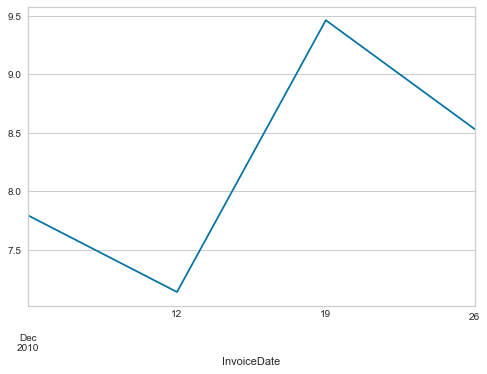

In [178]:
df.loc['2010', 'Quantity'].resample('W').mean().plot()
plt.show()

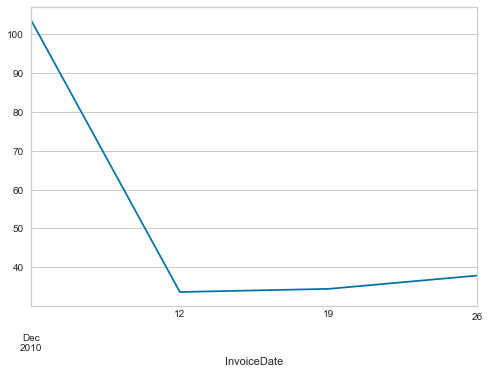

In [179]:
df.loc['2010', 'Quantity'].resample('W').std().plot()
plt.show()

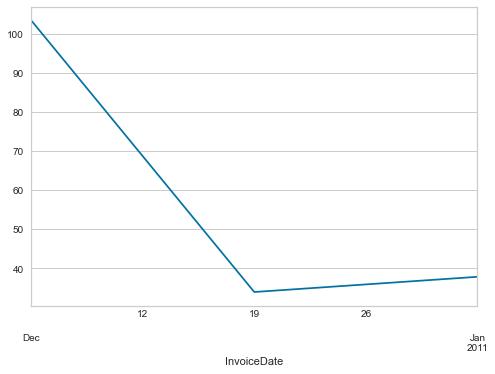

In [180]:
df.loc['2010', 'Quantity'].resample('2W').std().plot()
plt.show()

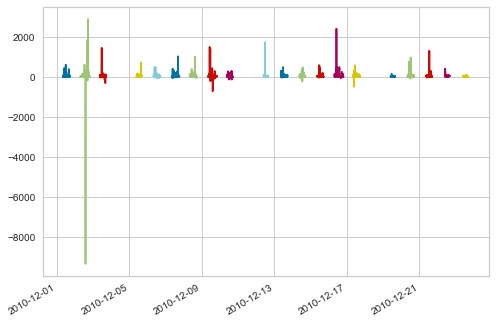

In [181]:
df.loc['2010', 'Quantity'].resample('D').plot()
plt.show()

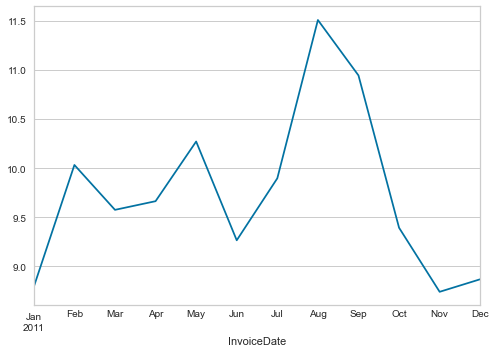

In [182]:
df.loc['2011', 'Quantity'].resample('M').mean().plot()
plt.show()

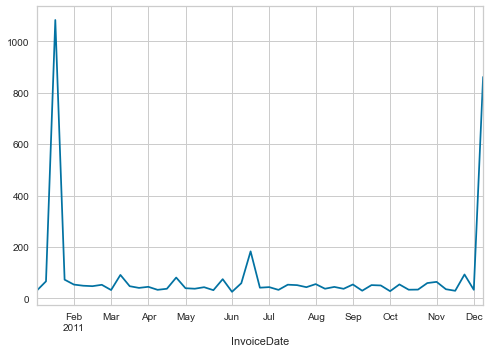

In [183]:
df.loc['2011', 'Quantity'].resample('W').std().plot()
plt.show()

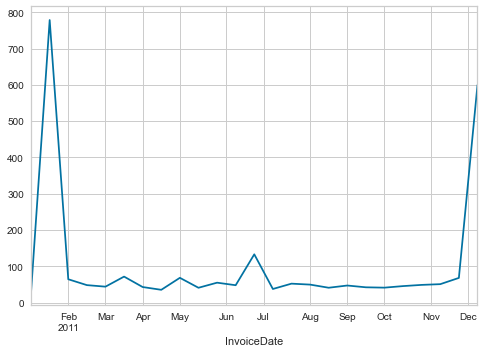

In [184]:
df.loc['2011', 'Quantity'].resample('2W').std().plot()
plt.show()

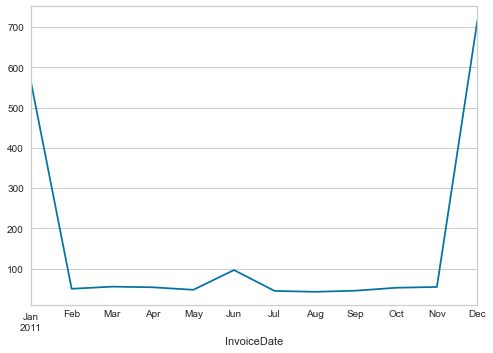

In [185]:
df.loc['2011', 'Quantity'].resample('M').std().plot()
plt.show()

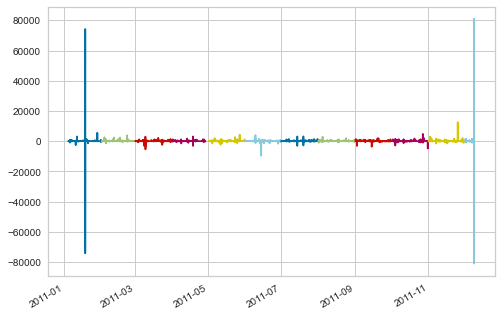

In [186]:
df.loc['2011', 'Quantity'].resample('M').plot()
plt.show()

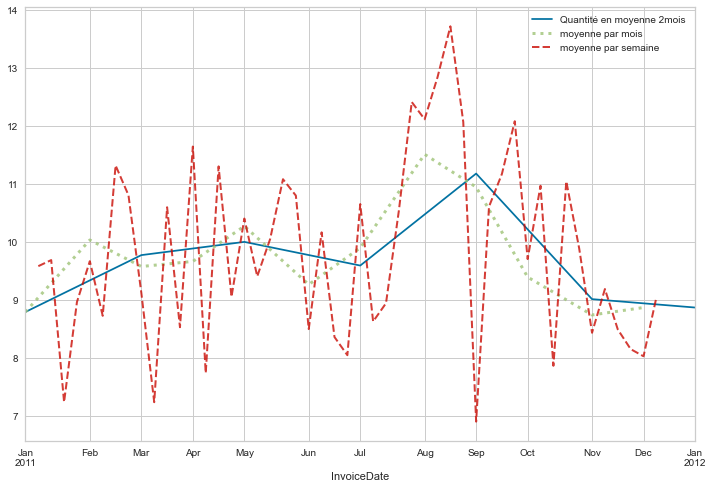

In [187]:
plt.figure(figsize=(12, 8))
df.loc['2011', 'Quantity'].resample('2M').mean().plot(label='Quantité en moyenne 2mois')
df.loc['2011', 'Quantity'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
df.loc['2011', 'Quantity'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

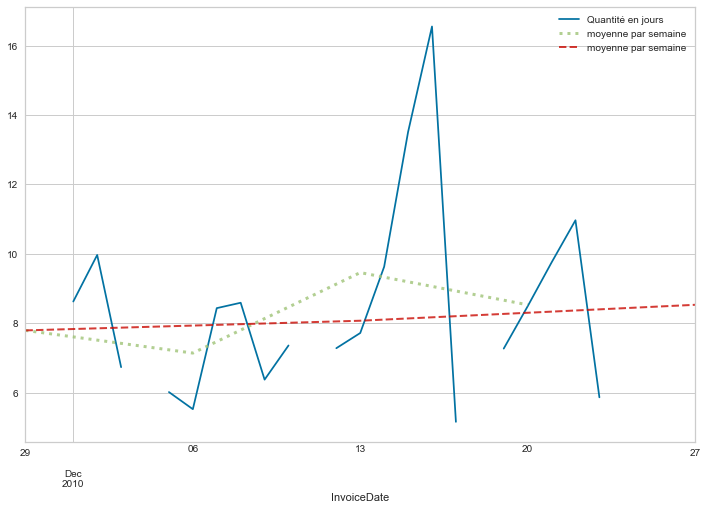

In [188]:
plt.figure(figsize=(12, 8))
df.loc['2010', 'Quantity'].resample('D').mean().plot(label='Quantité en jours')
df.loc['2010', 'Quantity'].resample('W').mean().plot(label='moyenne par semaine', lw=3, ls=':', alpha=0.8)
df.loc['2010', 'Quantity'].resample('2W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

In [189]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice       object
CustomerID     float64
Country         object
dtype: object

In [190]:
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [191]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

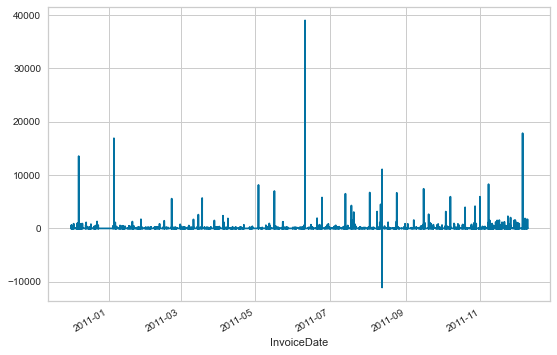

In [192]:
df['UnitPrice'].plot(figsize=(9, 6))
plt.show()

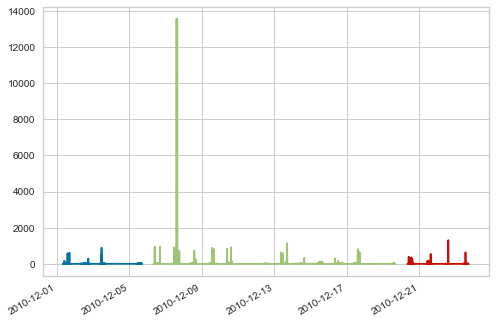

In [193]:
df.loc['2010', 'UnitPrice'].resample('2W').plot()
plt.show()

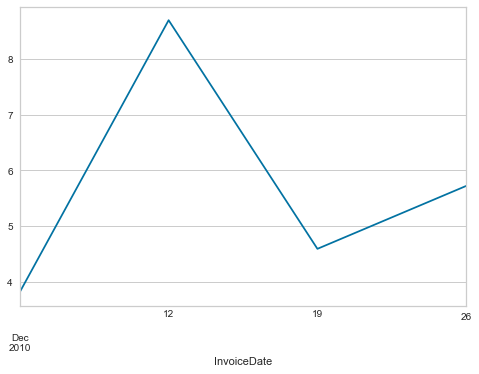

In [194]:
df.loc['2010', 'UnitPrice'].resample('W').mean().plot()
plt.show()

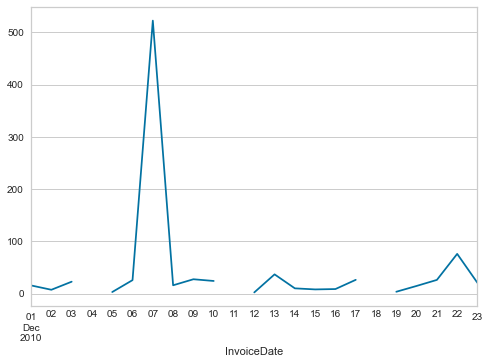

In [195]:
df.loc['2010', 'UnitPrice'].resample('D').std().plot()
plt.show()

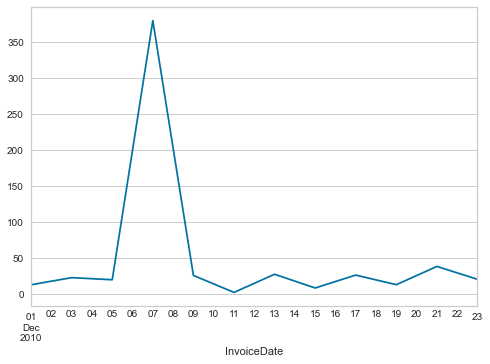

In [196]:
df.loc['2010', 'UnitPrice'].resample('2D').std().plot()
plt.show()

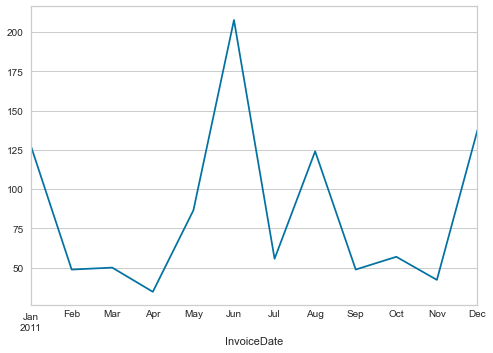

In [197]:
df.loc['2011', 'UnitPrice'].resample('M').std().plot()
plt.show()

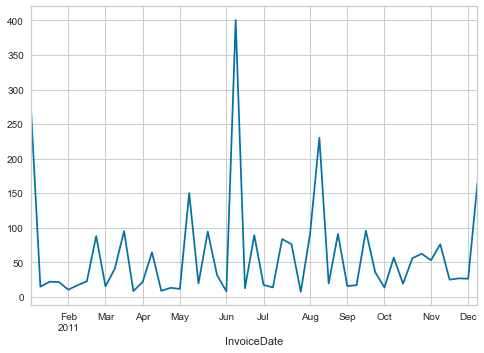

In [198]:
df.loc['2011', 'UnitPrice'].resample('W').std().plot()
plt.show()

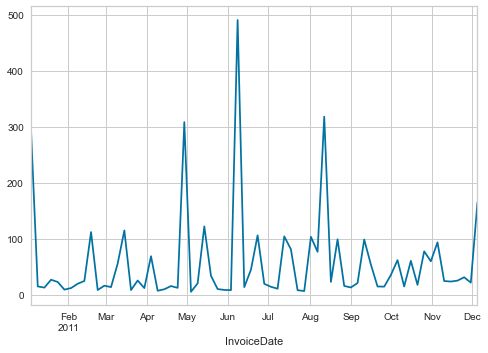

In [199]:
df.loc['2011', 'UnitPrice'].resample('5D').std().plot()
plt.show()

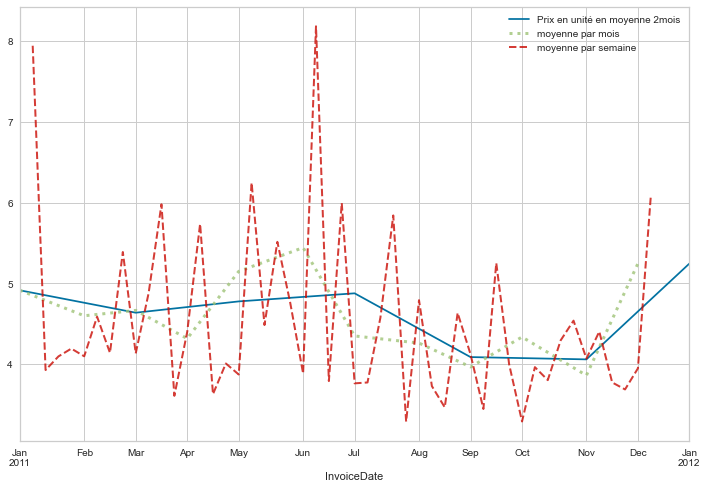

In [200]:
plt.figure(figsize=(12, 8))
df.loc['2011', 'UnitPrice'].resample('2M').mean().plot(label='Prix en unité en moyenne 2mois')
df.loc['2011', 'UnitPrice'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
df.loc['2011', 'UnitPrice'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

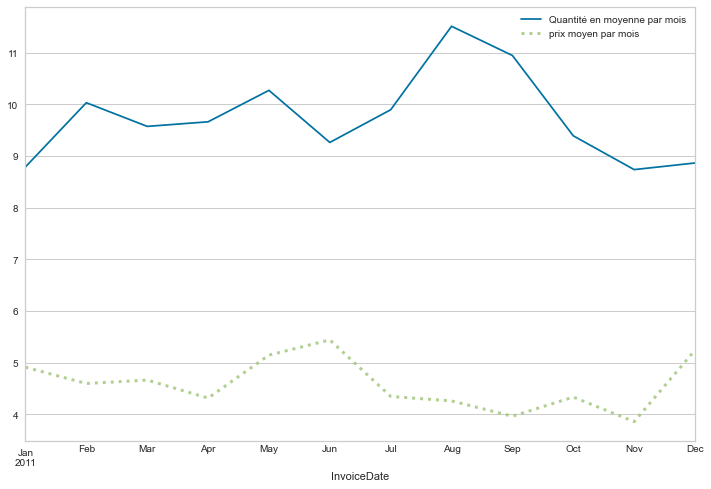

In [201]:
plt.figure(figsize=(12, 8))
df.loc['2011', 'Quantity'].resample('M').mean().plot(label='Quantité en moyenne par mois')
df.loc['2011', 'UnitPrice'].resample('M').mean().plot(label='prix moyen par mois', lw=3, ls=':', alpha=0.8)
#df.loc['2011', 'Quantity'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

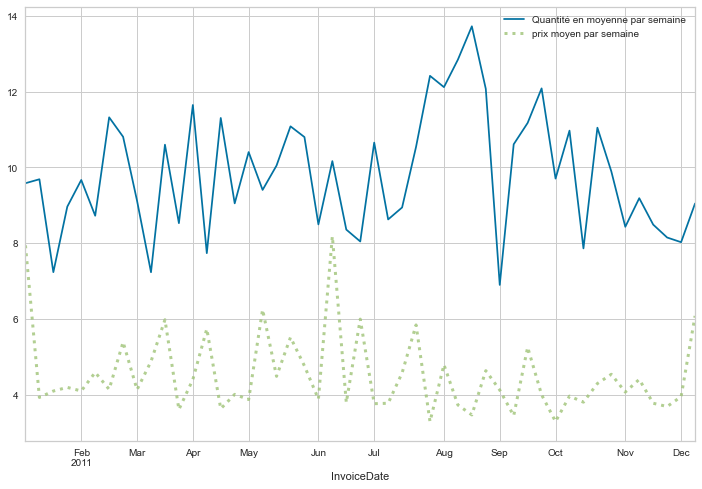

In [202]:
plt.figure(figsize=(12, 8))
df.loc['2011', 'Quantity'].resample('W').mean().plot(label='Quantité en moyenne par semaine')
df.loc['2011', 'UnitPrice'].resample('W').mean().plot(label='prix moyen par semaine', lw=3, ls=':', alpha=0.8)
#df.loc['2011', 'Quantity'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

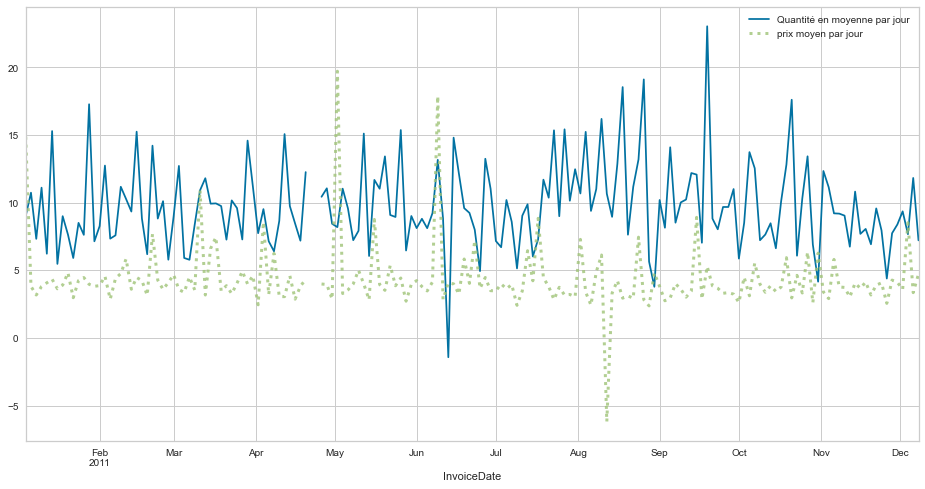

In [204]:
plt.figure(figsize=(16, 8))
df.loc['2011', 'Quantity'].resample('2D').mean().plot(label='Quantité en moyenne par jour')
df.loc['2011', 'UnitPrice'].resample('2D').mean().plot(label='prix moyen par jour', lw=3, ls=':', alpha=0.8)
#df.loc['2011', 'Quantity'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

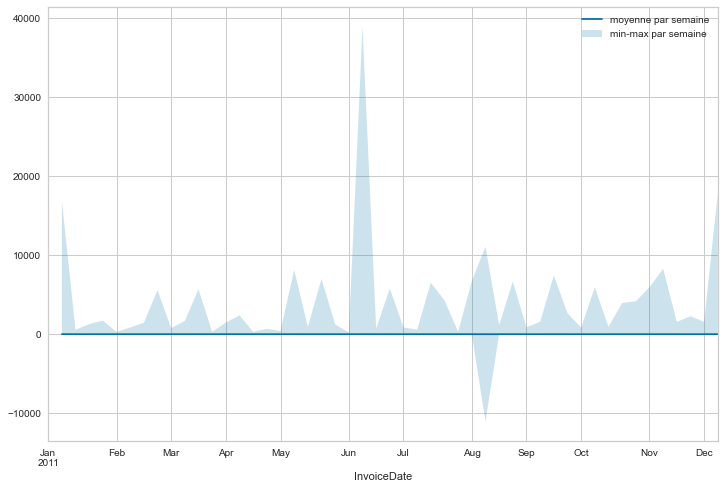

In [206]:
prix = df['UnitPrice'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
prix['mean']['2011'].plot(label='moyenne par semaine')
plt.fill_between(prix.index, prix['max'], prix['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

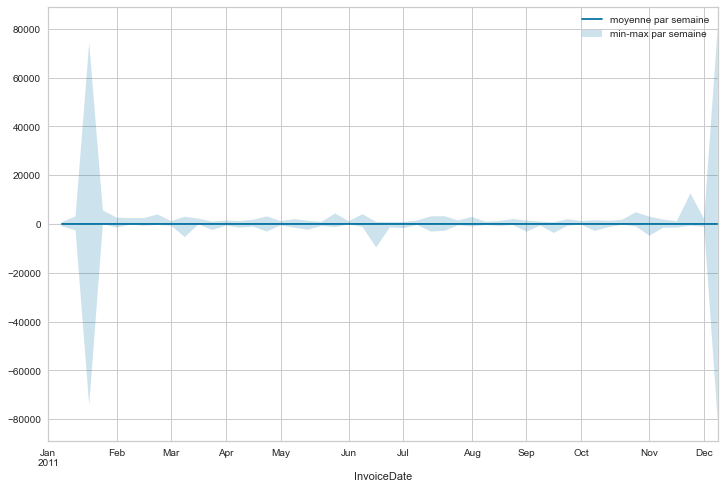

In [207]:
prix = df['Quantity'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
prix['mean']['2011'].plot(label='moyenne par semaine')
plt.fill_between(prix.index, prix['max'], prix['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

<AxesSubplot:xlabel='InvoiceDate'>

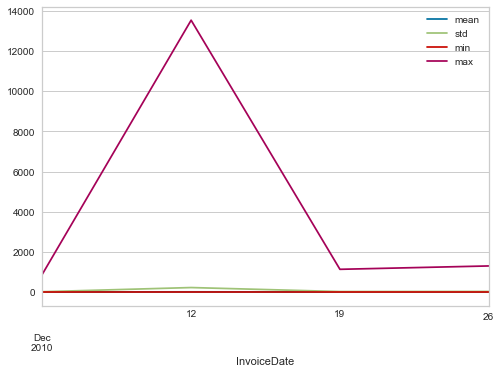

In [216]:
df.loc['2010', 'UnitPrice'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()

<AxesSubplot:xlabel='InvoiceDate'>

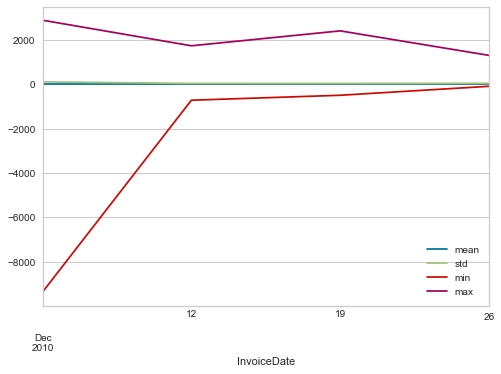

In [217]:
df.loc['2010', 'Quantity'].resample('W').agg(['mean', 'std', 'min', 'max']).plot()


array([<AxesSubplot:xlabel='InvoiceDate'>,
       <AxesSubplot:xlabel='InvoiceDate'>], dtype=object)

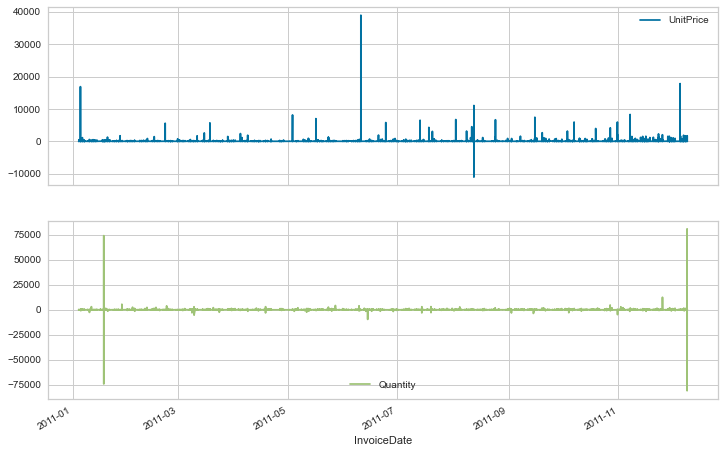

In [218]:
df[['UnitPrice', 'Quantity']]['2011'].plot(subplots=True, figsize=(12, 8))

#### Variables Quantitatives

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


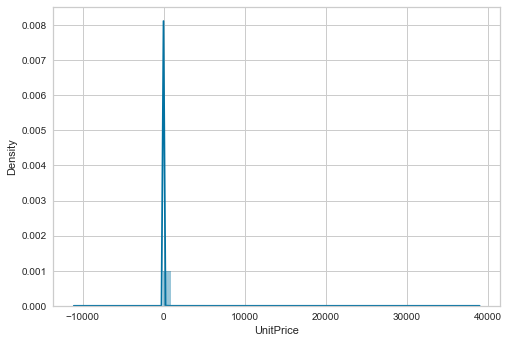

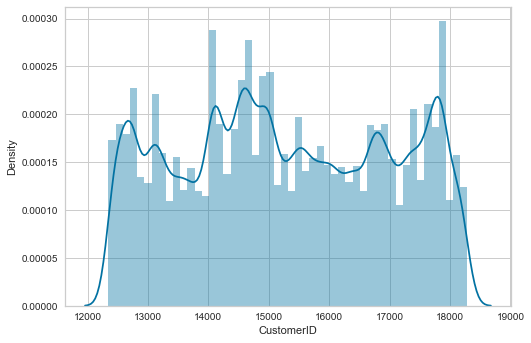

In [219]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

#### Variables Qualitatives

In [641]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

InvoiceNo----------------------------------------- ['536365' '536366' '536367' ... '581585' '581586' '581587']
StockCode----------------------------------------- ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Description--------------------------------------- ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
UnitPrice----------------------------------------- ['2,55' '3,39' '2,75' ... '933,17' '1714,17' '224,69']
Country------------------------------------------- ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'E

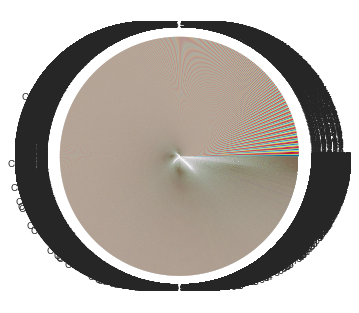

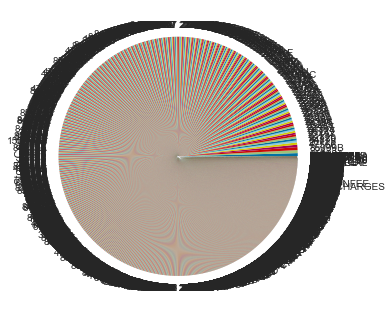

Error in callback <function flush_figures at 0x00000179273A8EE0> (for post_execute):


KeyboardInterrupt: 

In [642]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [220]:
dff = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
dff.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [221]:
(dff.isna().sum()/dff.shape[0]).sort_values(ascending=True)

InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
UnitPrice      0.000000
Country        0.000000
Description    0.002683
CustomerID     0.249267
dtype: float64

<AxesSubplot:ylabel='InvoiceDate'>

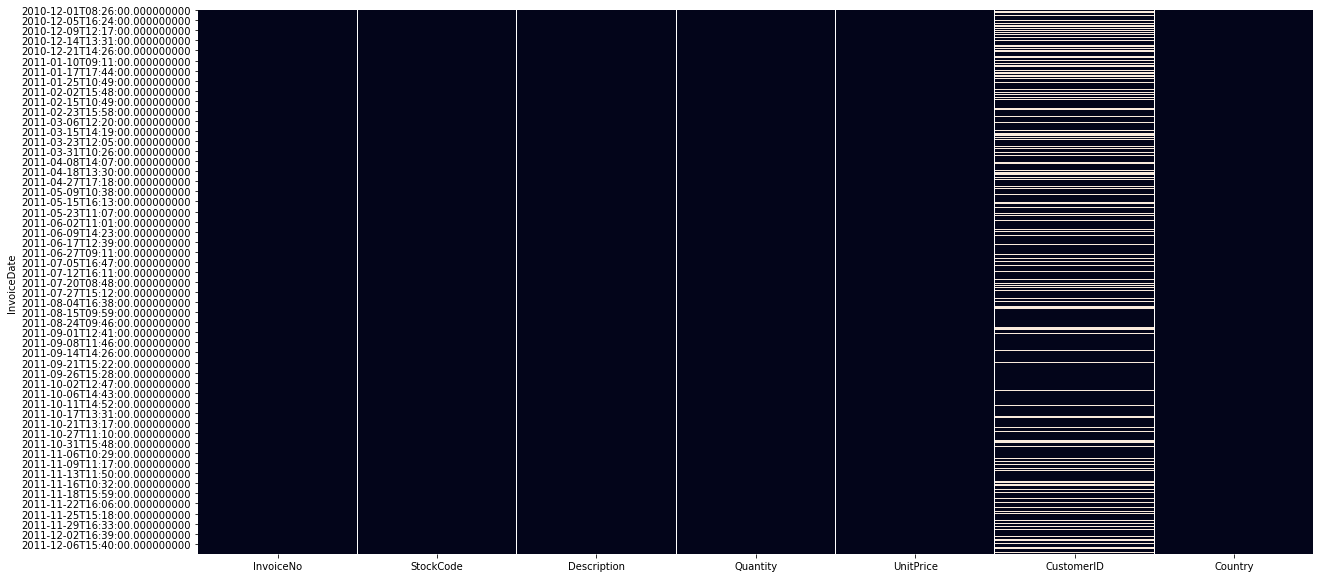

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(dff.isna(), cbar=False)

In [222]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom


---

# DATA CLEAN

    il y'a beaucoup des valeurs negatives dans la colonne QUANTITY

In [223]:
data_clean = data.copy()

In [224]:
data_clean = df[df['Quantity'] > 0]

In [225]:
data_clean.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [254]:
def data_date(df):
    df = df.reset_index()
    df["weekday"] = df["InvoiceDate"].dt.day_name()
    df.head()
    print('longuerur before:', len(df))
    df['Annee'] = df['InvoiceDate'].dt.year
    df['Mois'] = df['InvoiceDate'].dt.month
    df['Jour'] = df['InvoiceDate'].dt.day
    df.dropna(inplace=True)
    df = df.drop_duplicates()
    df = df[~(df.CustomerID.isnull())]
    print(df.isna().sum())
    df['Depense'] = df.Quantity * df.UnitPrice
    print('longuerur after:', len(df))
    return df

data_clean = data_date(data_clean)

longuerur before: 531285
InvoiceDate    0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
weekday        0
Annee          0
Mois           0
Jour           0
dtype: int64
longuerur after: 392732


In [255]:
data_clean.head(5)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34


---

## I. QUESTIONS (10 points)

##### 1. Volume. 
- Lors d’une dépense, combien de produits un client achète-t-il généralement? 
- Tracez la distribution associée. Faîtes apparaître le nombre moyen et le nombre médian de produits acheté lors d’une dépense, par pays.

In [256]:
question_1 = data_clean.groupby(['CustomerID']).agg({'Quantity':'sum'})

In [257]:
question_1 = question_1.reset_index()
question_1.head()

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [258]:
combien_de_produits_un_client_achète_généralement = question_1.mean()
print("Le nombre moyen des produits qu'un client achete generalement :",combien_de_produits_un_client_achète_généralement.Quantity.round(2))

Le nombre moyen des produits qu'un client achete generalement : 1190.57


#### Tracez la distribution associée.

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

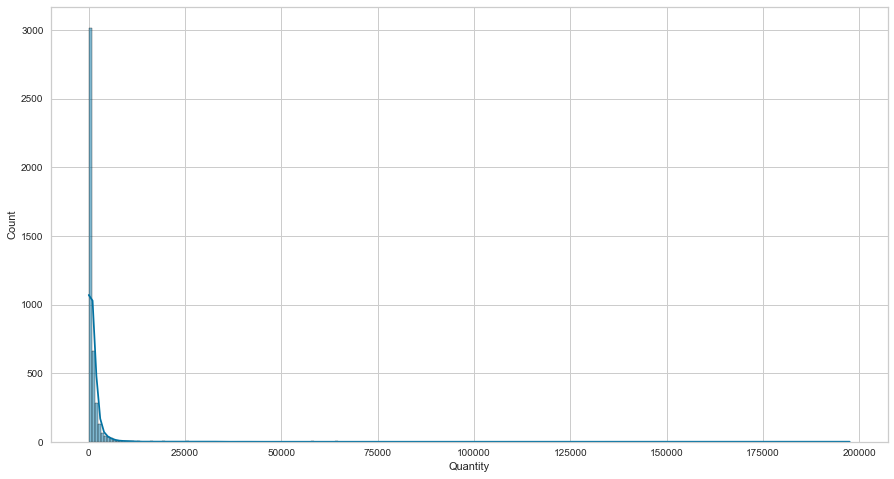

In [259]:
plt.figure(figsize=(15,8))
sns.histplot(data=question_1, x="Quantity", kde=True, bins=250)

#### Faîtes apparaître le nombre moyen et le nombre médian de produits acheté lors d’une dépense, par pays.

In [260]:
data_clean.groupby(['Country'])[['Country','Quantity']].head()

,Country,Quantity
0,United Kingdom,6
1,United Kingdom,6
2,United Kingdom,8
3,United Kingdom,6
4,United Kingdom,6
...,...,...
387013,RSA,8
387014,RSA,8
387015,RSA,6
387016,RSA,10


### - Le nombre moyen des produits achetés lors d’une dépense, par pays.

In [261]:
nombre_moyen = data_clean.rename(columns={'Quantity' :'Nombre moyen des produits achete par pays'})
nombre_moyen = nombre_moyen.groupby(['Country'])
nombre_moyen = nombre_moyen.agg({'Nombre moyen des produits achete par pays':'mean'})
nombre_moyen

,Nombre moyen des produits achete par pays
Country,
Australia,71.114020
Austria,12.263819
Bahrain,15.294118
Belgium,11.441162
Brazil,11.125000
Canada,18.298013
Channel Islands,12.697456
Cyprus,10.514096
Czech Republic,26.840000


--- 

## - Le nombre median des produits achetés lors d’une dépense, par pays.

In [262]:
nombre_median = data_clean.rename(columns={'Quantity' :'Nombre Median des produits achete par pays'})
nombre_median = nombre_median.groupby(['Country'])
nombre_median = nombre_median.agg({'Nombre Median des produits achete par pays':'median'})
nombre_median

,Nombre Median des produits achete par pays
Country,
Australia,32
Austria,10
Bahrain,6
Belgium,10
Brazil,10
Canada,12
Channel Islands,10
Cyprus,6
Czech Republic,24


---

# 2. Montant. 
- Lors d’une dépense, quel est le montant dépensé par un client généralement ? 
- Tracez la distribution associée. Faîtes apparaître le montant moyen et le montant médian d’un panier client, par pays.

## Lors d’une dépense, quel est le montant dépensé par un client généralement ?

In [263]:
produit_acheter_par_client = data_clean.groupby(['CustomerID']).agg({'StockCode':'count'}).reset_index()
produit_acheter_par_client

,CustomerID,StockCode
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,721


In [264]:
print("En moyenne un client achete : ", np.mean(produit_acheter_par_client['StockCode']), "produits")

En moyenne un client achete :  90.51209956211109 produits


### Tracez la distribution associée.

<AxesSubplot:xlabel='StockCode', ylabel='Count'>

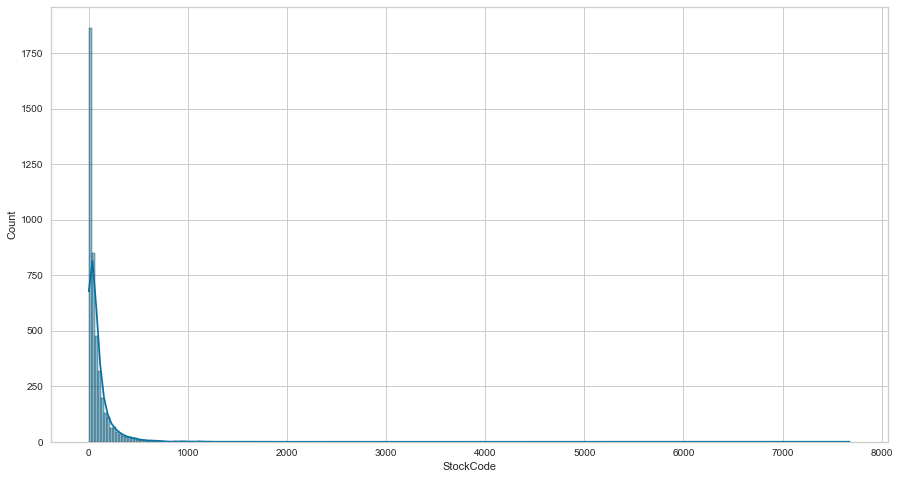

In [265]:
plt.figure(figsize=(15,8))
sns.histplot(data=produit_acheter_par_client, x="StockCode", kde=True, bins=250)

## Faîtes apparaître le nombre moyen de produits acheté lors d’une dépense, par pays.

In [267]:
montant_moyen_par_client = data_clean.rename(columns={'Depense' :'Montant Moyen Panier Par Pays'})
montant_moyen_par_client = montant_moyen_par_client.groupby(['Country'])
montant_moyen_par_client = montant_moyen_par_client.agg({'Montant Moyen Panier Par Pays':'mean'})
montant_moyen_par_client

,Montant Moyen Panier Par Pays
Country,
Australia,116.937340
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.363507
Cyprus,22.392786
Czech Republic,33.069600


## Faîtes apparaître le nombre médian de produits acheté lors d’une dépense, par pays.

In [269]:
montant_Median_par_client = data_clean.rename(columns={'Depense' :'Montant Median Panier Par Pays'})
montant_Median_par_client = montant_Median_par_client.groupby(['Country'])
montant_Median_par_client = montant_Median_par_client.agg({'Montant Median Panier Par Pays':'median'})
montant_Median_par_client

,Montant Median Panier Par Pays
Country,
Australia,66.00
Austria,17.17
Bahrain,25.50
Belgium,16.60
Brazil,19.65
Canada,16.50
Channel Islands,17.70
Cyprus,16.50
Czech Republic,31.20


In [271]:
# Faîtes apparaître le montant moyen d’un panier client, par pays.
montant_moyen = data_clean.groupby(['Country']).agg({'Depense':'mean'})
montant_moyen.head()

,Depense
Country,
Australia,116.937340
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500


In [272]:
 # Faîtes apparaître le montant médian d’un panier client, par pays.
montant_median = data_clean.groupby(['Country']).agg({'Depense':'median'})
montant_median.head()

,Depense
Country,
Australia,66.00
Austria,17.17
Bahrain,25.50
Belgium,16.60
Brazil,19.65


<AxesSubplot:xlabel='StockCode', ylabel='Count'>

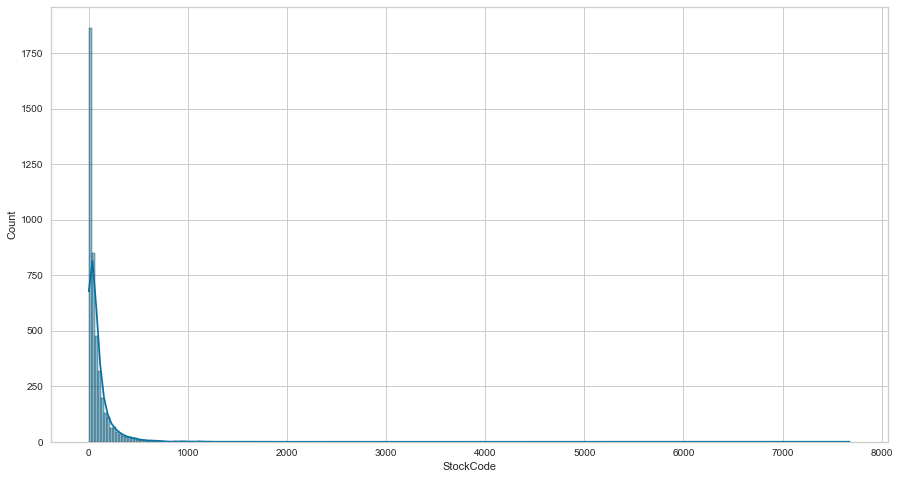

In [270]:
plt.figure(figsize=(15,8))
sns.histplot(data=produit_acheter_par_client, x="StockCode", kde=True, bins=250)

# 3. Volume. 
- Quels sont les top-5 produits les plus vendus durant le premier trimestre 2011 ? 
- Pendant le second trimestre 2011 ?

In [274]:
data_clean_trimestre = data_clean.copy()

In [275]:
data_clean_trimestre.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34


In [276]:
data_clean.Mois.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [277]:
Mask1 = (data_clean['Annee']==2011)
Mask1 = data_clean[Mask1]

In [278]:
Mask1.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
41683,2011-01-04 10:00:00,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,13313.0,United Kingdom,Tuesday,2011,1,4,19.5
41684,2011-01-04 10:00:00,539993,21499,BLUE POLKADOT WRAP,25,0.42,13313.0,United Kingdom,Tuesday,2011,1,4,10.5


In [279]:
Mask1.Mois.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [280]:
Mask2 = (Mask1['Mois'].between(1,3))

In [281]:
data_clean_trimestre = Mask1[Mask2]

In [282]:
data_clean_trimestre.tail()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
139127,2011-03-31 19:54:00,548548,22423,REGENCY CAKESTAND 3 TIER,1,12.75,17781.0,United Kingdom,Thursday,2011,3,31,12.75
139128,2011-03-31 19:54:00,548548,21361,LOVE LARGE WOOD LETTERS,7,12.75,17781.0,United Kingdom,Thursday,2011,3,31,89.25
139129,2011-03-31 19:55:00,548549,84763,ZINC FINISH 15CM PLANTER POTS,100,1.06,16365.0,United Kingdom,Thursday,2011,3,31,106.00
139130,2011-03-31 19:55:00,548549,22222,CAKE PLATE LOVEBIRD WHITE,1,4.95,16365.0,United Kingdom,Thursday,2011,3,31,4.95
139131,2011-03-31 19:55:00,548549,22776,SWEETHEART CAKESTAND 3 TIER,1,9.95,16365.0,United Kingdom,Thursday,2011,3,31,9.95


In [283]:
data_clean_trimestre.Mois.unique()

array([1, 2, 3], dtype=int64)

# 4. Volume. 
- Montant. Quels sont les 5 pays qui ont générés le plus gros chiffre d’affaire pendant le premier trimestre 2011 ?

In [284]:
data_clean_trimestre['Depense'].groupby(data_clean_trimestre['Country']).agg('sum').sort_values(ascending = False).head(5)

Country
United Kingdom    1261278.72
Netherlands         72039.56
EIRE                53690.07
Australia           40937.12
Germany             40854.58
Name: Depense, dtype: float64

# 5. Volume

#### Montant. Tracez l’évolution mensuelle du montant moyen d’un panier client pour chacun de ces cinq pays.

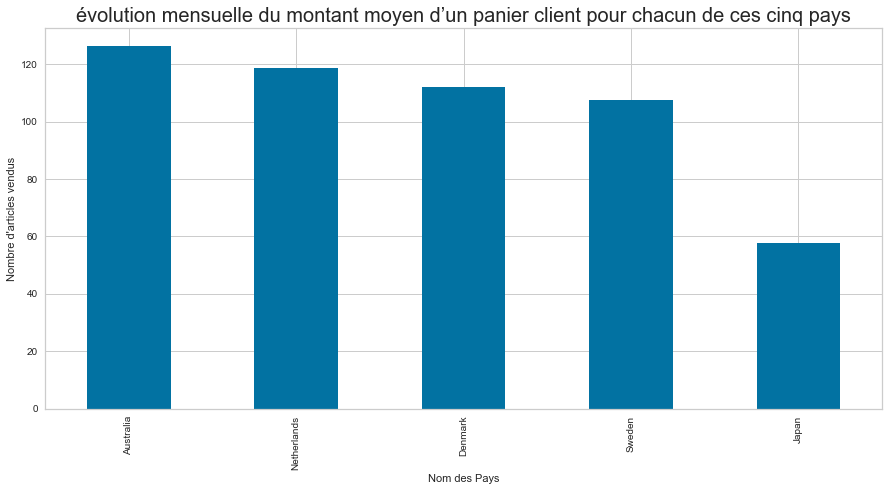

In [288]:
data_clean_trimestre['Depense'].groupby(data_clean_trimestre['Country']).agg('mean').sort_values(ascending = False).head(5).plot.bar(figsize = (15, 7))

plt.title("évolution mensuelle du montant moyen d’un panier client pour chacun de ces cinq pays", fontsize = 20)
plt.xlabel('Nom des Pays')
plt.ylabel("Nombre d'articles vendus")
plt.show()

#### Montant. Tracez l’évolution mensuelle du montant médian d’un panier client pour chacun de ces cinq pays.

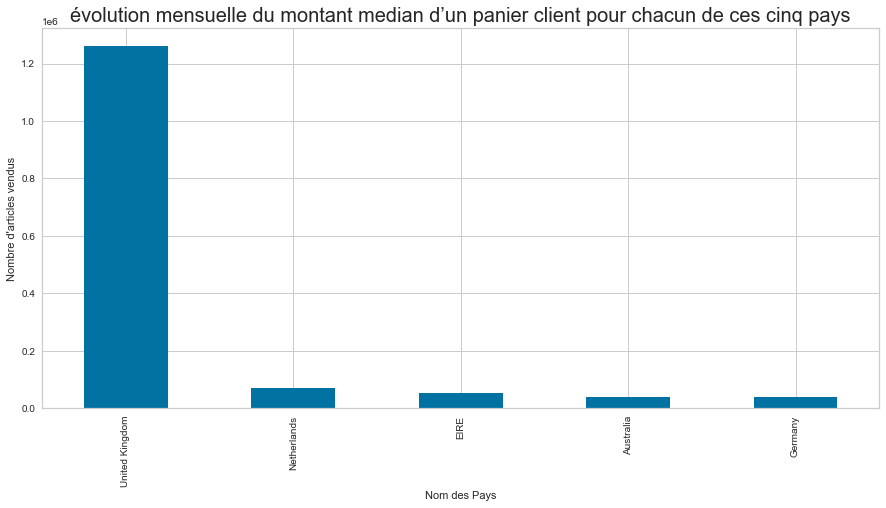

In [289]:
data_clean_trimestre['Depense'].groupby(data_clean_trimestre['Country']).agg('sum').sort_values(ascending = False).head(5).plot.bar(figsize = (15, 7))

plt.title("évolution mensuelle du montant median d’un panier client pour chacun de ces cinq pays", fontsize = 20)
plt.xlabel('Nom des Pays')
plt.ylabel("Nombre d'articles vendus")
plt.show()

---

# 2. Volume.
- Fréquence. A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni ?

In [290]:
data_frequence = data_clean.copy()

In [291]:
dt_reference = data_frequence.InvoiceDate.max()
dt_reference = dt_reference + datetime.timedelta(days = 1)

In [292]:
dt_reference

Timestamp('2011-12-10 12:50:00')

In [293]:
data_frequence['jours_depuis_le_dernier_achat'] = dt_reference - data_frequence.InvoiceDate
data_frequence['num_jours_depuis_le_dernier_achat'] = data_frequence['jours_depuis_le_dernier_achat'].astype('timedelta64[D]')

In [294]:
data_frequence.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense,jours_depuis_le_dernier_achat,num_jours_depuis_le_dernier_achat
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30,374 days 04:24:00,374.0
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34,374 days 04:24:00,374.0


In [295]:
client_history = data_frequence.groupby("CustomerID").min().reset_index()[['CustomerID', 'num_jours_depuis_le_dernier_achat']]
client_history.rename(columns={'num_jours_depuis_le_dernier_achat':'Achat_recent'}, inplace=True)
client_history.Achat_recent.describe()

count    4339.000000
mean       92.518322
std       100.009747
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: Achat_recent, dtype: float64

In [713]:
client_history.head()

,CustomerID,Achat_recent
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [714]:
val = data_frequence[['CustomerID', 'Depense']].groupby("CustomerID").sum().reset_index()
client_history = client_history.merge(val, how='outer')
client_history.Depense = client_history.Depense+0.001
client_frequence = data_frequence[['CustomerID', 'Depense']].groupby("CustomerID").count().reset_index()
client_frequence.rename(columns={'Depense':'frequency'},inplace=True)
client_history = client_history.merge(client_frequence, how='outer')

In [715]:
client_history

,CustomerID,Achat_recent,Depense,frequency
0,12346.0,326.0,77183.601,1
1,12347.0,2.0,4310.001,182
2,12348.0,75.0,1797.241,31
3,12349.0,19.0,1757.551,73
4,12350.0,310.0,334.401,17
...,...,...,...,...
4334,18280.0,278.0,180.601,10
4335,18281.0,181.0,80.821,7
4336,18282.0,8.0,178.051,12
4337,18283.0,4.0,2045.531,721


#### Fréquence. A quelle fréquence dépensent les 100 plus gros clients du Royaume-Uni ?

In [716]:
client_history['Pays'] = data_frequence.Country

In [717]:
client_history.head()

,CustomerID,Achat_recent,Depense,frequency,Pays
0,12346.0,326.0,77183.601,1,United Kingdom
1,12347.0,2.0,4310.001,182,United Kingdom
2,12348.0,75.0,1797.241,31,United Kingdom
3,12349.0,19.0,1757.551,73,United Kingdom
4,12350.0,310.0,334.401,17,United Kingdom


In [718]:
united_kingdom = client_history[client_history['Pays'] == 'United Kingdom'].sort_values(by=['Depense'], ascending=False)
united_kingdom

,CustomerID,Achat_recent,Depense,frequency,Pays
4202,18102.0,1.0,259657.301,431,United Kingdom
3729,17450.0,8.0,194390.791,336,United Kingdom
55,12415.0,24.0,124914.531,716,United Kingdom
1334,14156.0,10.0,117210.081,1395,United Kingdom
3772,17511.0,3.0,91062.381,963,United Kingdom
...,...,...,...,...,...
723,13307.0,120.0,15.001,1,United Kingdom
3961,17763.0,263.0,15.001,1,United Kingdom
3324,16878.0,84.0,13.301,3,United Kingdom
3218,16738.0,298.0,3.751,1,United Kingdom


In [719]:
united_kingdom = united_kingdom.head(100)
united_kingdom

,CustomerID,Achat_recent,Depense,frequency,Pays
4202,18102.0,1.0,259657.301,431,United Kingdom
3729,17450.0,8.0,194390.791,336,United Kingdom
55,12415.0,24.0,124914.531,716,United Kingdom
1334,14156.0,10.0,117210.081,1395,United Kingdom
3772,17511.0,3.0,91062.381,963,United Kingdom
...,...,...,...,...,...
4207,18109.0,2.0,8004.921,441,United Kingdom
66,12428.0,26.0,7956.461,294,United Kingdom
2163,15290.0,5.0,7943.221,204,United Kingdom
334,12757.0,16.0,7834.651,364,United Kingdom


In [720]:
frequence_depensent = united_kingdom.frequency.mean()
frequence_depensent

504.57

In [721]:
display("Les 100 plus gros clients du Royaume-Uni dépensent a une fréquence de {} % ".format(frequence_depensent))

'Les 100 plus gros clients du Royaume-Uni dépensent a une fréquence de 504.57 % '

--- 

## II. Modèles (10 points)

#### 1. Quel sera le chiffre d’affaire global de la société en Décembre 2011 ?

In [722]:
Msk = (data_clean['Annee']==2011) #& (data_clean['Mois'].between(1,3))
Msk = data_clean[Msk]

In [723]:
Mask2 = (Msk[Msk['Mois'] == 12 ])

In [724]:
Mask2.head(3)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
506150,2011-12-01 08:33:00,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,1.65,15687.0,United Kingdom,Thursday,2011,12,1,39.60
506151,2011-12-01 08:33:00,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,5.95,15687.0,United Kingdom,Thursday,2011,12,1,17.85
506152,2011-12-01 08:33:00,579899,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,3.75,15687.0,United Kingdom,Thursday,2011,12,1,15.00


In [725]:
Mask2.groupby(['Country']).agg({'Depense':'median'})

,Depense
Country,
Austria,142.80
Belgium,14.61
Channel Islands,30.00
Denmark,13.50
EIRE,16.50
Finland,41.60
France,16.80
Germany,17.34
Greece,16.50


In [726]:
Mask2.Country.unique()

array(['United Kingdom', 'Germany', 'EIRE', 'France', 'Finland',
       'Belgium', 'Portugal', 'USA', 'Channel Islands', 'Norway',
       'Sweden', 'Denmark', 'Italy', 'Greece', 'Spain', 'Netherlands',
       'Iceland', 'Austria'], dtype=object)

In [727]:
united_kingdom_2 = Mask2[Mask2['Country'] == 'United Kingdom']
united_kingdom_2.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
506150,2011-12-01 08:33:00,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,1.65,15687.0,United Kingdom,Thursday,2011,12,1,39.60
506151,2011-12-01 08:33:00,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,5.95,15687.0,United Kingdom,Thursday,2011,12,1,17.85


In [728]:
united_kingdom_2.Country.unique()

array(['United Kingdom'], dtype=object)

In [730]:
ca = united_kingdom_2.Depense.sum()

In [731]:
print("le chiffre d’affaire global de la société en Décembre 2011 est de {} euro".format(ca))

le chiffre d’affaire global de la société en Décembre 2011 est de 471381.82 euro


#### 2. Combien de clients vont réaliser au moins un achat en Décembre 2011 en France ?

In [535]:
data_clean.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense,jours_depuis_le_dernier_achat,num_jours_depuis_le_dernier_achat
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30,374 days 04:24:00,374.0
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34,374 days 04:24:00,374.0


##### Pour conforter votre réponse, vous indiquerez la performance de votre modèle sur une période de test antérieur, e.g., Novembre 2011.

# DATA PREPARATION

In [536]:
def get_new_df(dataframe):
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["InvoiceNo"].str.contains("C",na=False)]
    dataframe = dataframe[~(dataframe["Description"] == "POSTAGE")]
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["UnitPrice"]
    return dataframe

df = get_new_df(data_clean)

In [542]:
df.head(3)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense,jours_depuis_le_dernier_achat,num_jours_depuis_le_dernier_achat,TotalPrice
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30,374 days 04:24:00,374.0,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34,374 days 04:24:00,374.0,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,22.00,374 days 04:24:00,374.0,22.00


In [544]:
def get_rfm():
    today_date = dt.datetime(2011, 12, 11)
    rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                         "InvoiceNo": lambda Invoice: Invoice.nunique(),
                                         "TotalPrice": lambda TotalPrice: TotalPrice.sum()})
    rfm.columns = ["recency", "frequency", "monetary"]
    rfm = rfm[(rfm['monetary'] > 0)]
    return rfm
rfm = get_rfm()

In [545]:
rfm.head(10)

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1437.24
12349.0,19,1,1457.55
12350.0,311,1,294.40
12352.0,37,8,2226.04
12353.0,205,1,89.00
12354.0,233,1,1079.40
12355.0,215,1,459.40


## Standardization

In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [561]:
#!pip install --user yellowbrick

In [562]:
sc = MinMaxScaler((0, 1))
rfm = sc.fit_transform(rfm)

rfm[0:10]

array([[8.71313673e-01, 0.00000000e+00, 2.76497221e-01],
       [5.36193029e-03, 2.87081340e-02, 1.54271634e-02],
       [2.01072386e-01, 1.43540670e-02, 5.13548551e-03],
       [4.82573727e-02, 0.00000000e+00, 5.20824620e-03],
       [8.31099196e-01, 0.00000000e+00, 1.04125516e-03],
       [9.65147453e-02, 3.34928230e-02, 7.96136569e-03],
       [5.46916890e-01, 0.00000000e+00, 3.05408576e-04],
       [6.21983914e-01, 0.00000000e+00, 3.85352182e-03],
       [5.73726542e-01, 0.00000000e+00, 1.63236854e-03],
       [5.89812332e-02, 9.56937799e-03, 8.89779675e-03]])

## Clustering avec K-Means

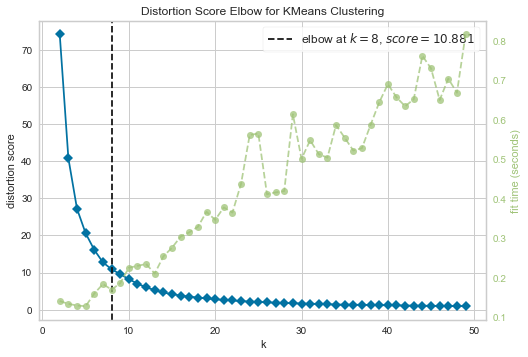

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [563]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 50))
elbow.fit(rfm)
elbow.show()

In [564]:
elbow.elbow_value_

8

## IMPLEMENTATION

In [565]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(rfm)
clusters = kmeans.labels_

rfm = get_rfm()

rfm["cluster_no"] = clusters
rfm["cluster_no"] = rfm["cluster_no"] + 1

rfm.head(10)

,recency,frequency,monetary,cluster_no
CustomerID,,,,
12346.0,326,1,77183.60,4
12347.0,3,7,4310.00,7
12348.0,76,4,1437.24,3
12349.0,19,1,1457.55,7
12350.0,311,1,294.40,4
12352.0,37,8,2226.04,1
12353.0,205,1,89.00,5
12354.0,233,1,1079.40,2
12355.0,215,1,459.40,5


# MODELISATION AVEC LSTM

In [96]:
data_clean.head(2)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34


In [97]:
data_clean.set_index("InvoiceDate", inplace = True)

In [104]:
data_clean.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,weekday,Annee,Mois,Jour,Depense
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,20.34


##### NORMALISATION

In [145]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(data_clean[['Depense']])  # fit does nothing.
transformer


Normalizer()

In [147]:
data_normal = transformer.transform(data_clean[['Depense']])

In [154]:
data_normal

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [158]:
data_clean[data_clean['Quantity'] < 10000]['Depense']

InvoiceDate
2010-12-01 08:26:00    15.30
2010-12-01 08:26:00    20.34
2010-12-01 08:26:00    22.00
2010-12-01 08:26:00    20.34
2010-12-01 08:26:00    20.34
                       ...  
2011-12-09 12:50:00    10.20
2011-12-09 12:50:00    12.60
2011-12-09 12:50:00    16.60
2011-12-09 12:50:00    16.60
2011-12-09 12:50:00    14.85
Name: Depense, Length: 392729, dtype: float64

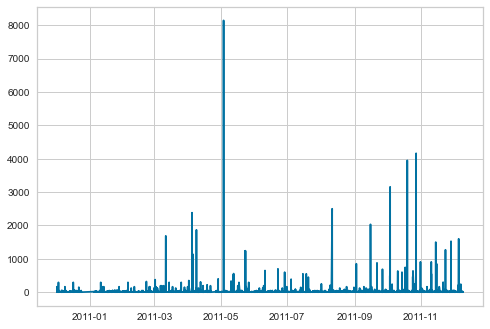

In [167]:
plt.plot(data_clean[data_clean['Quantity'] < 2.0]['Depense'])

In [ ]:
def split_data(df, symbol):
    data = df.filter(['Close']).loc[df['companies']== symbol]
    dataset = data.values.reshape(-1, 1)
    training_data_len = int(np.ceil(len(dataset) * .8 ))
    print(f'Longueur du data: {training_data_len}')
    print('================================================')
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data= scaler.fit_transform(dataset)
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    test_data = scaled_data[training_data_len - 60: , :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    return x_train, y_train, x_test, y_test, scaler, data, dataset, training_data_len